In [1]:
print("hello world! ")

hello world! 


In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_context('paper', font_scale=0.73)
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})

In [19]:
#paths
base_model_dir = "/home/ryan/haveibeentrainedon/models/unstealthy_scaling"
model_size = "70M"
scored_file = "scored.csv"

In [20]:
models = list(filter(lambda x: x[-5:] == "model", os.listdir(os.path.join(base_model_dir, model_size))))
models = sorted(models, key = lambda x: eval(x[:-6]))
models

['15_model',
 '30_model',
 '45_model',
 '60_model',
 '75_model',
 '90_model',
 '105_model',
 '120_model',
 '135_model',
 '150_model',
 '165_model',
 '180_model',
 '195_model',
 '210_model',
 '225_model',
 '240_model',
 '255_model',
 '270_model',
 '285_model',
 '300_model']

In [21]:
total_dfs = []
for model_type in models:
    total_dfs += [pd.read_csv(os.path.join(base_model_dir, model_size, model_type, scored_file), header=None)]
total_dfs

[                 0
 0     8.611970e+03
 1     4.497210e+04
 2     7.670459e+04
 3     8.621239e+05
 4     2.612484e+06
 ...            ...
 996   6.252255e+04
 997   4.218917e+03
 998   1.073503e+05
 999   1.642461e+05
 1000  7.250322e+04
 
 [1001 rows x 1 columns],
                  0
 0     6.317282e+03
 1     7.377130e+04
 2     1.059023e+05
 3     1.262787e+06
 4     2.271260e+06
 ...            ...
 996   6.007347e+04
 997   4.308776e+03
 998   1.341734e+05
 999   1.548644e+05
 1000  1.051988e+05
 
 [1001 rows x 1 columns],
                  0
 0     3.478349e+03
 1     5.493055e+04
 2     9.947853e+04
 3     1.266794e+06
 4     2.566202e+06
 ...            ...
 996   5.806318e+04
 997   4.021276e+03
 998   1.122527e+05
 999   1.284887e+05
 1000  7.756030e+04
 
 [1001 rows x 1 columns],
                  0
 0     1.228989e+03
 1     6.958988e+04
 2     1.033113e+05
 3     1.414083e+06
 4     3.380941e+06
 ...            ...
 996   6.018902e+04
 997   3.828637e+03
 998   1.049871e

In [7]:
#We first extract our watermark from the null hypothesis

watermark_df = pd.DataFrame(columns=total_dfs[0].columns)

for df in total_dfs:
    curr_watermark = df.iloc[0]
    watermark_df.loc[len(watermark_df)] = curr_watermark
    df.drop(0, inplace=True)

watermark_df.reset_index(drop=True, inplace=True)
watermark_df

,0,type
0,52116.035156,1.0
1,47063.433594,1.0
2,55053.484375,1.0
3,39024.957031,1.0
4,42498.523438,1.0
5,34784.238281,1.0
6,30985.783203,1.0
7,35201.312500,1.0
8,63922.875000,1.0
9,37493.085938,1.0


In [8]:
combined_df = pd.concat(total_dfs, keys=[str(i) for i in range(15, 301, 15)], names=["rep_num"])
combined_df.reset_index(inplace=True)
combined_df

,rep_num,level_1,0,type
0,15,1,27222.902344,0
1,15,2,27548.630859,0
2,15,3,274700.187500,0
3,15,4,737923.000000,0
4,15,5,200510.703125,0
...,...,...,...,...
19995,300,996,20169.431641,0
19996,300,997,5289.316895,0
19997,300,998,158717.046875,0
19998,300,999,57932.585938,0


In [22]:
x = [i for i in range(15, 301, 15)]
y = [df[0][0] for df in total_dfs]
print(x)
print(y)

[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300]
[8611.9697265625, 6317.28173828125, 3478.34912109375, 1228.9892578125, 790.6729736328125, 512.03955078125, 261.3570556640625, 209.06021118164065, 135.81089782714844, 233.24319458007807, 85.84437561035156, 91.56523895263672, 49.02910614013672, 70.92289733886719, 46.08917236328125, 67.18457794189453, 47.75167846679688, 52.61274337768555, 47.3471565246582, 29.330516815185547]


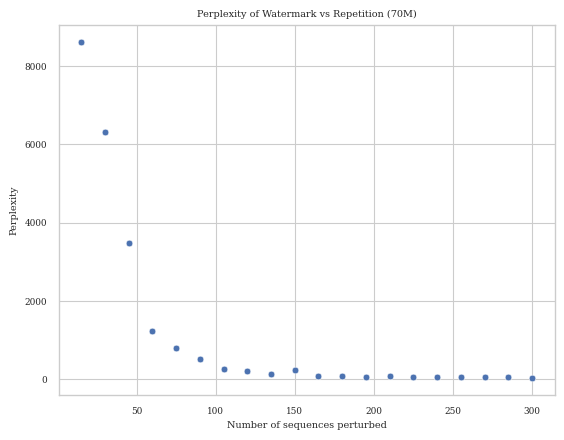

In [26]:
sns.scatterplot(x = x, y = y)
plt.xlabel("Number of sequences perturbed")
plt.ylabel("Perplexity")
plt.title("Perplexity of Watermark vs Repetition (70M)")
plt.show()

In [34]:
z_scores = []
null_mean = []
null_stdev = []

for df in total_dfs:
    null = df[0][:]
    mean = null.mean()
    stdev = null.std()
    rank = null.rank(method="min")
    print(rank[null == df[0][0]].values[0])

    statistic = df[0][0]

    z_scores += [(statistic - mean) / stdev]
    null_mean += [mean]
    null_stdev += [stdev]


133.0
88.0
49.0
9.0
5.0
3.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [28]:
z_scores


[-0.3620480412496526,
 -0.3734396386385325,
 -0.41849578661260717,
 -0.45490265120271245,
 -0.4594662996025033,
 -0.39689682726403847,
 -0.3934506946541334,
 -0.3842248378511547,
 -0.31696696198818,
 -0.4247619609065012,
 -0.38349465668439064,
 -0.4058367349150104,
 -0.4226798902337441,
 -0.3678440031255548,
 -0.45602300828254083,
 -0.4193028095331208,
 -0.4628371480613545,
 -0.4132751288955461,
 -0.3898084135307558,
 -0.37313084730323604]

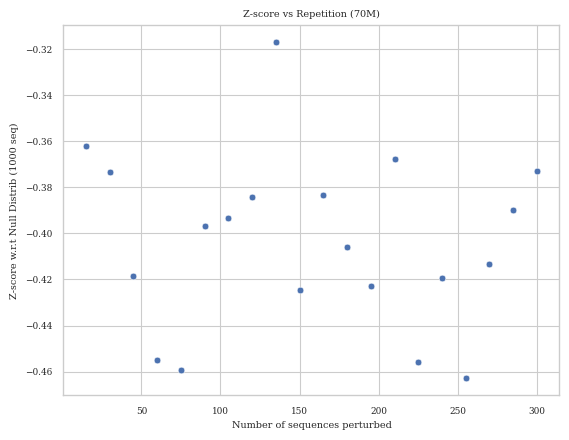

In [29]:
sns.scatterplot(x = x, y = z_scores)
plt.xlabel("Number of sequences perturbed")
plt.ylabel("Z-score w.r.t Null Distrib (1000 seq)")
plt.title("Z-score vs Repetition (70M)")
plt.show()